In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import csv
import pandas as pd
import seaborn as sns

with open('raw_data_modified.csv') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

data = pd.read_csv('raw_data_modified.csv')
df = pd.DataFrame(data)
data.head()

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,2,4,1,1,1,1,1,4,2,3,1,1,H
1,2,3,2,1,1,1,2,4,1,1,1,3,H
2,1,3,1,2,1,1,2,3,3,1,2,2,H
3,2,4,2,3,2,2,3,4,2,4,3,4,H
4,1,2,1,1,2,2,3,1,1,1,1,2,H


In [2]:
data['P1'] = abs(data['P1'] - 6)

In [3]:
honest = df[df['CONDITION'] == 'H']
df1 = pd.DataFrame(honest)
print(honest)
dishonest = df[df['CONDITION'] == 'D']
df2 = pd.DataFrame(dishonest)
print(dishonest)

     P1  N2  P3  M4  P5  M6  N7  N8  M9  P10  M11  N12 CONDITION
0     4   4   1   1   1   1   1   4   2    3    1    1         H
1     4   3   2   1   1   1   2   4   1    1    1    3         H
2     5   3   1   2   1   1   2   3   3    1    2    2         H
3     4   4   2   3   2   2   3   4   2    4    3    4         H
4     5   2   1   1   2   2   3   1   1    1    1    2         H
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...       ...
479   4   1   2   1   1   1   2   4   1    4    1    3         H
480   5   3   1   3   1   1   3   4   1    3    1    1         H
481   3   1   3   1   2   1   1   1   1    3    1    2         H
482   2   4   3   3   1   4   5   5   2    4    1    3         H
483   1   5   1   1   1   1   1   1   1    1    1    1         H

[484 rows x 13 columns]
     P1  N2  P3  M4  P5  M6  N7  N8  M9  P10  M11  N12 CONDITION
484   2   3   1   1   2   2   3   4   1    2    1    2         D
485   2   2   1   1   1   1   3   4   2    2    1    2         D


In [4]:
with open('original_model_predicted_dishonest.csv') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

det_fake = pd.read_csv('original_model_predicted_dishonest.csv')
det_fakedf = pd.DataFrame(det_fake)

In [8]:
outliers = [34, 78, 138, 188, 214, 312, 347, 413, 470]

In [9]:
subnum = []

for val in det_fakedf['Unnamed: 0']:
    i = 0
    if val > 493:
        val1 = val - 493
    else:
        val1 = val
        
    for out in outliers:
        if val1 > out:
            i += 1

    if val < 493:
        subnum.append(val-i)
    else:
        subnum.append(val-493-i)

In [12]:
hon_test = pd.DataFrame(df1.iloc[subnum,:13])
hon_test

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
455,4,3,1,4,4,4,3,4,4,4,4,3,H
418,3,2,3,2,1,1,4,3,1,4,4,1,H
481,3,1,3,1,2,1,1,1,1,3,1,2,H
483,1,5,1,1,1,1,1,1,1,1,1,1,H
186,4,4,1,1,1,2,1,4,2,4,1,1,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,4,4,2,3,2,3,4,5,3,3,4,4,H
470,4,4,3,4,2,3,5,4,4,3,2,4,H
6,5,2,2,2,1,2,1,1,1,3,1,2,H
361,2,4,2,4,2,3,3,4,2,3,3,4,H


In [13]:
hon_test["Condition"] = hon_test.CONDITION.map({"H":0, "D":1})
hon_test.drop("CONDITION", axis = 1,inplace = True)

In [14]:
hon_test

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,Condition
455,4,3,1,4,4,4,3,4,4,4,4,3,0
418,3,2,3,2,1,1,4,3,1,4,4,1,0
481,3,1,3,1,2,1,1,1,1,3,1,2,0
483,1,5,1,1,1,1,1,1,1,1,1,1,0
186,4,4,1,1,1,2,1,4,2,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,4,4,2,3,2,3,4,5,3,3,4,4,0
470,4,4,3,4,2,3,5,4,4,3,2,4,0
6,5,2,2,2,1,2,1,1,1,3,1,2,0
361,2,4,2,4,2,3,3,4,2,3,3,4,0


In [15]:
dis_test = pd.DataFrame(det_fakedf.iloc[:,1:14])
dis_test

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,1,2,2,2,2,1,2,2,2,2,1,1,1
1,5,5,1,5,1,1,3,3,1,3,1,3,1
2,2,2,1,1,1,1,2,2,1,1,1,2,1
3,5,1,1,1,1,1,3,3,1,1,1,1,1
4,5,2,1,2,2,1,4,3,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5,3,5,5,5,1,1,3,1,1,1,1,1
92,2,3,1,1,1,1,2,3,1,2,1,2,1
93,1,2,2,2,1,2,1,1,1,3,1,2,0
94,4,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:
remove = []
for i in subnum:
    remove.append(i)
    remove.append(i+484)

In [17]:
prova = []
for i in range(0,968):
    prova.append(i)
    
for el in remove:
    if el in prova:
        prova.remove(el)

In [18]:
train = data.iloc[prova,:]
traindf = pd.DataFrame(train)

e = []
for elem in traindf:
    e.append(elem)

In [19]:
train["Condition"] = train.CONDITION.map({"H":0, "D":1})
train.drop("CONDITION", axis = 1,inplace = True)

/tmp/ipykernel_73594/3120782120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Condition"] = train.CONDITION.map({"H":0, "D":1})
/home/matteo/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaler.data_max_
X = scaler.fit_transform(train)
df1_scaled = pd.DataFrame(X, columns=e)
df1_scaled

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,0.75,0.75,0.00,0.00,0.00,0.00,0.00,0.75,0.25,0.50,0.0,0.00,0.0
1,0.75,0.75,0.25,0.50,0.25,0.25,0.50,0.75,0.25,0.75,0.5,0.75,0.0
2,1.00,0.25,0.00,0.00,0.25,0.25,0.50,0.00,0.00,0.00,0.0,0.25,0.0
3,0.75,0.25,0.75,0.50,0.00,0.25,0.25,0.00,0.25,1.00,0.5,0.00,0.0
4,0.75,0.25,0.50,0.25,1.00,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.0
774,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.25,0.0,0.25,1.0
775,0.75,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.0,0.75,1.0
776,1.00,0.25,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.25,0.0,0.00,1.0


In [21]:
X2 = scaler.transform(hon_test)
df2_scaled = pd.DataFrame(X2, columns=e)
df2_scaled

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,0.75,0.50,0.00,0.75,0.75,0.75,0.50,0.75,0.75,0.75,0.75,0.50,0.0
1,0.50,0.25,0.50,0.25,0.00,0.00,0.75,0.50,0.00,0.75,0.75,0.00,0.0
2,0.50,0.00,0.50,0.00,0.25,0.00,0.00,0.00,0.00,0.50,0.00,0.25,0.0
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,0.75,0.75,0.00,0.00,0.00,0.25,0.00,0.75,0.25,0.75,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.75,0.75,0.25,0.50,0.25,0.50,0.75,1.00,0.50,0.50,0.75,0.75,0.0
92,0.75,0.75,0.50,0.75,0.25,0.50,1.00,0.75,0.75,0.50,0.25,0.75,0.0
93,1.00,0.25,0.25,0.25,0.00,0.25,0.00,0.00,0.00,0.50,0.00,0.25,0.0
94,0.25,0.75,0.25,0.75,0.25,0.50,0.50,0.75,0.25,0.50,0.50,0.75,0.0


In [22]:
X3 = scaler.transform(dis_test)
df3_scaled = pd.DataFrame(X3, columns=e)
df3_scaled

/home/matteo/anaconda3/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CONDITION
Feature names seen at fit time, yet now missing:
- Condition

  warnings.warn(message, FutureWarning)


,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12,CONDITION
0,0.00,0.25,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25,0.0,0.00,1.0
1,1.00,1.00,0.00,1.00,0.00,0.00,0.50,0.50,0.00,0.50,0.0,0.50,1.0
2,0.25,0.25,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.00,0.0,0.25,1.0
3,1.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.0,0.00,1.0
4,1.00,0.25,0.00,0.25,0.25,0.00,0.75,0.50,0.00,0.25,0.0,0.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.00,0.50,1.00,1.00,1.00,0.00,0.00,0.50,0.00,0.00,0.0,0.00,1.0
92,0.25,0.50,0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.25,0.0,0.25,1.0
93,0.00,0.25,0.25,0.25,0.00,0.25,0.00,0.00,0.00,0.50,0.0,0.25,0.0
94,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.0


In [23]:
hon_train = df1_scaled[df1_scaled['CONDITION'] == 0]
hon_train = hon_train.iloc[:,:12]
dis_train = df1_scaled[df1_scaled['CONDITION'] == 1]
dis_train = dis_train.iloc[:,:12]

hon_test = df2_scaled.iloc[:,:12]
dis_test = df3_scaled.iloc[:,:12]

In [24]:
dis_test

,P1,N2,P3,M4,P5,M6,N7,N8,M9,P10,M11,N12
0,0.00,0.25,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25,0.0,0.00
1,1.00,1.00,0.00,1.00,0.00,0.00,0.50,0.50,0.00,0.50,0.0,0.50
2,0.25,0.25,0.00,0.00,0.00,0.00,0.25,0.25,0.00,0.00,0.0,0.25
3,1.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.0,0.00
4,1.00,0.25,0.00,0.25,0.25,0.00,0.75,0.50,0.00,0.25,0.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.00,0.50,1.00,1.00,1.00,0.00,0.00,0.50,0.00,0.00,0.0,0.00
92,0.25,0.50,0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.25,0.0,0.25
93,0.00,0.25,0.25,0.25,0.00,0.25,0.00,0.00,0.00,0.50,0.0,0.25
94,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00


In [25]:
print(hon_train)
print(dis_train)

       P1    N2    P3    M4    P5    M6    N7    N8    M9   P10   M11   N12
0    0.75  0.75  0.00  0.00  0.00  0.00  0.00  0.75  0.25  0.50  0.00  0.00
1    0.75  0.75  0.25  0.50  0.25  0.25  0.50  0.75  0.25  0.75  0.50  0.75
2    1.00  0.25  0.00  0.00  0.25  0.25  0.50  0.00  0.00  0.00  0.00  0.25
3    0.75  0.25  0.75  0.50  0.00  0.25  0.25  0.00  0.25  1.00  0.50  0.00
4    0.75  0.25  0.50  0.25  1.00  0.50  0.00  0.50  0.00  0.00  0.00  0.00
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
384  0.25  0.75  0.25  0.75  0.25  0.50  0.50  0.75  0.25  0.50  0.50  0.75
385  1.00  0.50  0.00  0.25  0.00  0.00  0.50  0.50  0.25  0.00  0.25  0.25
386  0.75  0.00  0.25  0.00  0.00  0.00  0.25  0.75  0.00  0.75  0.00  0.50
387  1.00  0.50  0.00  0.50  0.00  0.00  0.50  0.75  0.00  0.50  0.00  0.00
388  0.25  0.75  0.50  0.50  0.00  0.75  1.00  1.00  0.25  0.75  0.00  0.50

[389 rows x 12 columns]
       P1    N2   P3    M4    P5    M6    N7    N8    M9   P10 

In [26]:
pred_glob = []
perc = []
reg_glob = []
rmse_glob = []
mae_glob = []
mse_glob = []
m_glob = []

In [34]:
e = []
for elem in hon_train:
  if elem != 'CONDITION':
    e.append(elem)
print(e)

['P1', 'N2', 'P3', 'M4', 'P5', 'M6', 'N7', 'N8', 'M9', 'P10', 'M11', 'N12']


In [28]:
def regression(label, model, parameters, X_train, Y_train, X_test, Y_test, ymin = 67, el = e):

  model_cv = model
  clf = GridSearchCV(model_cv, parameters, cv = 5)
  clf.fit(X_train, Y_train)

  mod = clf.best_estimator_

  mod.fit(X_train, Y_train)
  pred = mod.predict(X_test)

  mae = mean_absolute_error(Y_test, pred)
  mse = mean_squared_error(Y_test, pred)
  m = mean_squared_error(Y_test, pred, multioutput='raw_values')
  rmse = np.sqrt(mse)
  print('{} \nThe mean squared error is: {:.4f} \nThe mean absolute error is: {:.4f}'.format(label, mse, mae))

  f, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
  f.set_figwidth(12)
  f.set_figheight(6)
  f.suptitle('Average onest answers versus reconstructed honest answers')
  axes[0].scatter(el, Y_test.mean(axis=0), label='Honest', marker='o')
  axes[0].plot(pred.mean(axis=0), label='Reconstructed', marker='^', color = 'darkorange')
  axes[0].fill_between(range(len(e)),pred.mean(axis=0)-m, pred.mean(axis=0)+m, alpha=.2)
  axes[0].set_ylim(0, 0.7)
  axes[0].grid()
  axes[0].legend()

  percentage = []
  for elem in range(len(Y_test.mean(axis=0))):
    dist = np.abs(pred.mean(axis=0)[elem]-Y_test.mean(axis=0)[elem])
    percentage.append(100 - 100*(dist/Y_test.mean(axis=0)[elem]))
  
  axes[1].plot(percentage, label='Accuracy', marker='^', color = 'darkorange')
  axes[1].set_ylim(ymin,100)
  axes[1].grid()
  axes[1].legend()

  plt.show()

  pred_glob.append(pred.mean(axis=0))
  perc.append(percentage)
  reg_glob.append(label)
  rmse_glob.append(rmse)
  mse_glob.append(mse)
  mae_glob.append(mae)
  m_glob.append(m)

  return('{}:    RMSE: {:.4f} MSE: {:.4f} MAE: {:.4f}'.format(label, rmse, mse, mae))

Linear Regression 
The mean squared error is: 0.0705 
The mean absolute error is: 0.2183


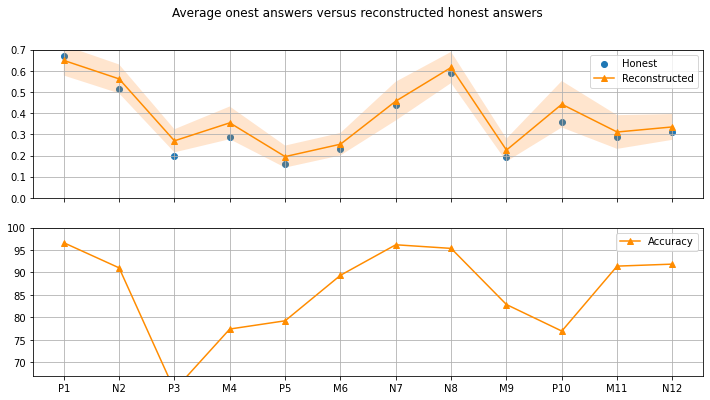

K Neighbors Regressor 
The mean squared error is: 0.0678 
The mean absolute error is: 0.2133


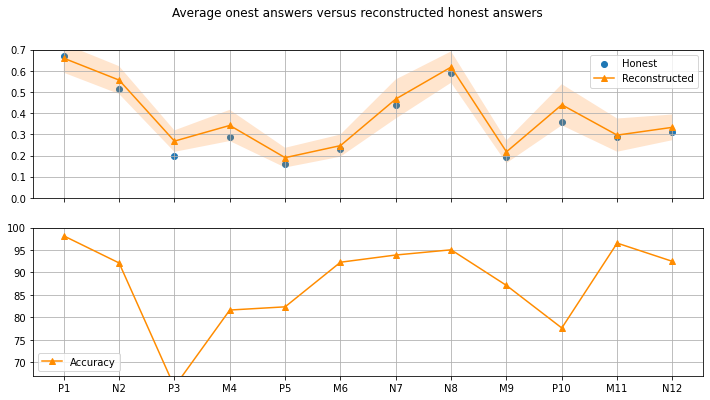

Random Forest Regressor 
The mean squared error is: 0.0678 
The mean absolute error is: 0.2140


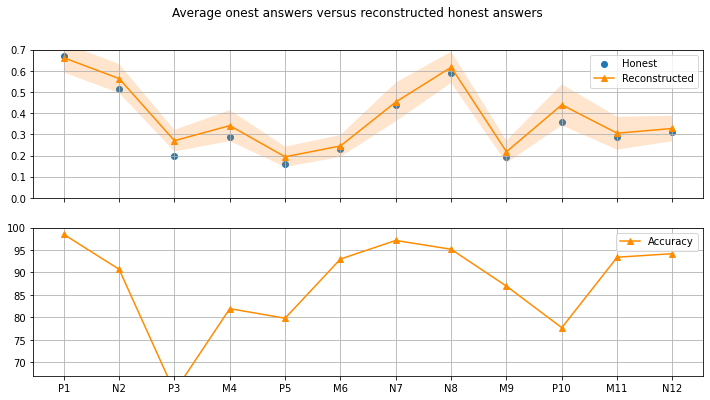

Decision Tree Regressor 
The mean squared error is: 0.0688 
The mean absolute error is: 0.2156


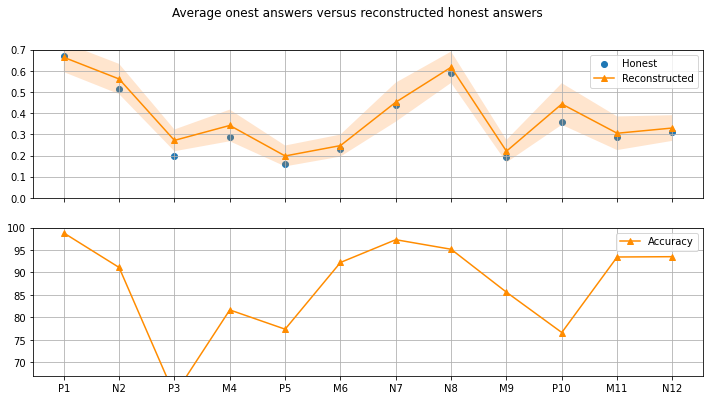

Support Vector RBF Regressor 
The mean squared error is: 0.0700 
The mean absolute error is: 0.2186


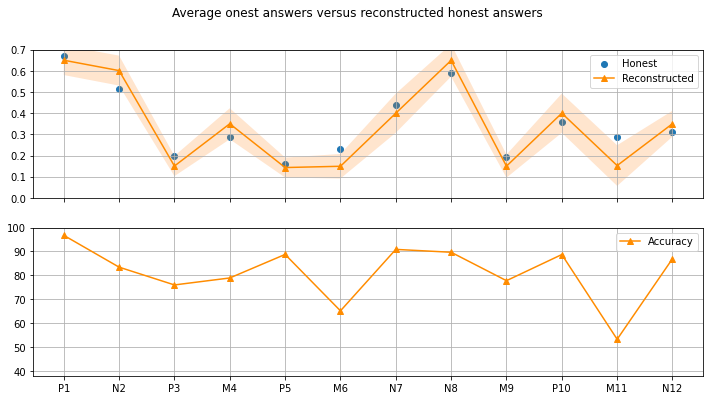

Support Vector Poly Regressor 
The mean squared error is: 0.0702 
The mean absolute error is: 0.2182


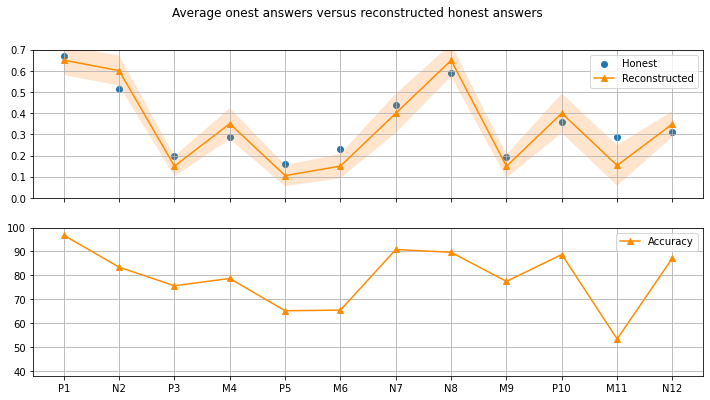

Support Vector Linear Regressor 
The mean squared error is: 0.0701 
The mean absolute error is: 0.2183


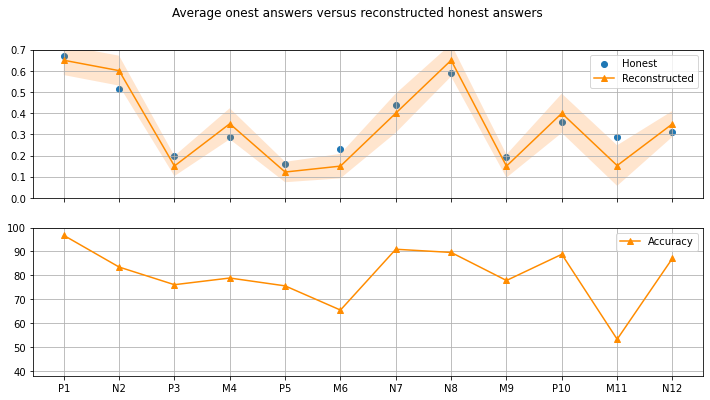

Multi Layer Perceptron Regressor 
The mean squared error is: 0.0678 
The mean absolute error is: 0.2134


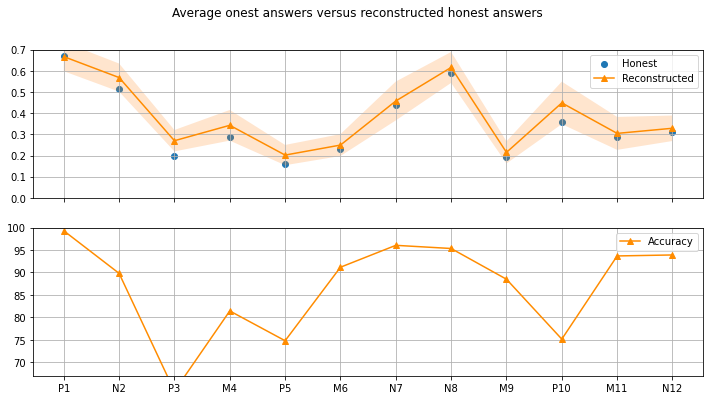

Ridge Regressor 
The mean squared error is: 0.0678 
The mean absolute error is: 0.2138


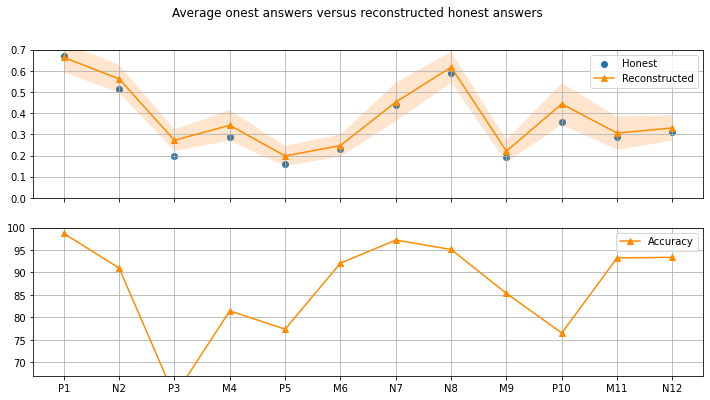

'Ridge Regressor:    RMSE: 0.2603 MSE: 0.0678 MAE: 0.2138'

In [29]:
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {}
regression('Linear Regression', LinearRegression(), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'n_neighbors': range(100,201,5)}
regression('K Neighbors Regressor', KNeighborsRegressor(), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'n_estimators': range(10,61,10), 'random_state': [123]}
regression('Random Forest Regressor', RandomForestRegressor(max_depth=1, min_samples_leaf=2), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'max_depth': range(1,8,1), 'min_samples_leaf': range(1,11,1), 'random_state': [123]}
regression('Decision Tree Regressor', DecisionTreeRegressor(), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'estimator__C': [100, 10, 1, 0.1, 0.001, 0.0001]}
regression('Support Vector RBF Regressor', MultiOutputRegressor(SVR(epsilon=0.1)), parameters, dis_train, hon_train, dis_test, hon_test, 38)

parameters = {'estimator__C': [100, 10, 1, 0.1, 0.001, 0.0001]}
regression('Support Vector Poly Regressor', MultiOutputRegressor(SVR(kernel='poly',epsilon=0.1)), parameters, dis_train, hon_train, dis_test, hon_test, 38)

parameters = {'estimator__C': [100, 10, 1, 0.1, 0.001, 0.0001]}
regression('Support Vector Linear Regressor', MultiOutputRegressor(SVR(kernel='linear', epsilon=0.1)), parameters, dis_train, hon_train, dis_test, hon_test, 38)

parameters = {'hidden_layer_sizes': [(7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,),(16,),]}
regression('Multi Layer Perceptron Regressor', MLPRegressor(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=123), parameters, dis_train, hon_train, dis_test, hon_test)

parameters = {'alpha': [1000, 100, 10, 1, 0.1, 0.001, 0.0001], 'random_state': [123]}
regression('Ridge Regressor', Ridge(), parameters, dis_train, hon_train, dis_test, hon_test)

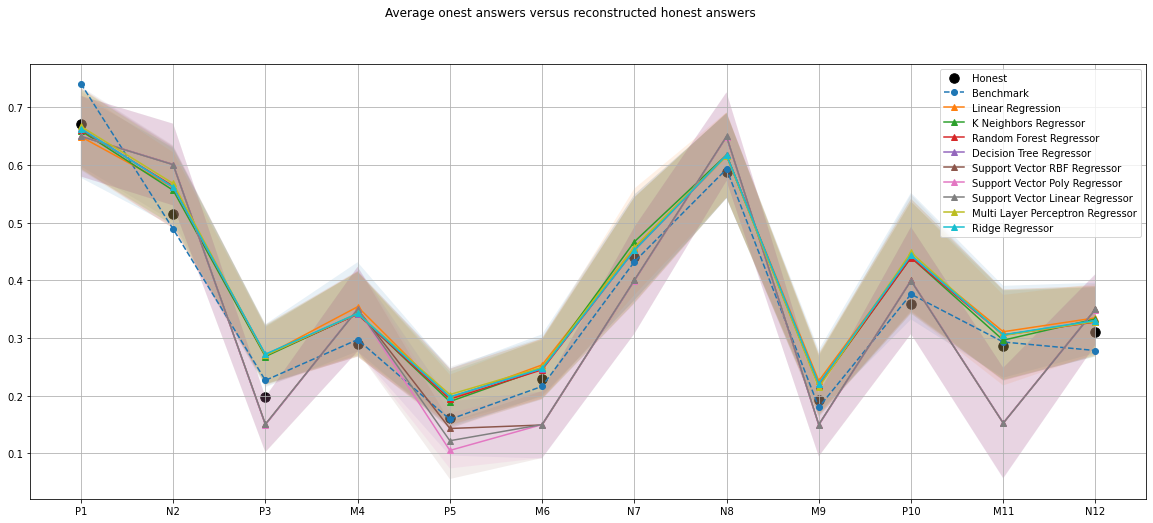

In [94]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
f.suptitle('Average onest answers versus reconstructed honest answers')

plt.scatter(e, hon_test.mean(axis=0), label='Honest', marker='o', color='black', s=90)

values = [0.2125323,  0.23126615, 0.14341085, 0.17248062, 0.0497416,  0.14082687, 0.16925065, 0.23385013, 
          0.12015504, 0.17829457, 0.20994832, 0.10658915]

plt.plot(dis_test.mean(axis=0)+values, label='Benchmark', marker='o', linestyle='dashed')

for i in range(len(pred_glob)):
  plt.plot(pred_glob[i], label=reg_glob[i], marker='^')
  plt.fill_between(range(len(e)),pred_glob[i]-m_glob[i], pred_glob[i]+m_glob[i], alpha=.1)

plt.legend()
plt.grid()
plt.xticks(range(0,12), labels=e)
plt.show()

In [99]:
acc = 100 - 100*(np.abs(hon_test.mean(axis=0) - (dis_test.mean(axis=0)+values)))
acc.mean()

98.09566113888889

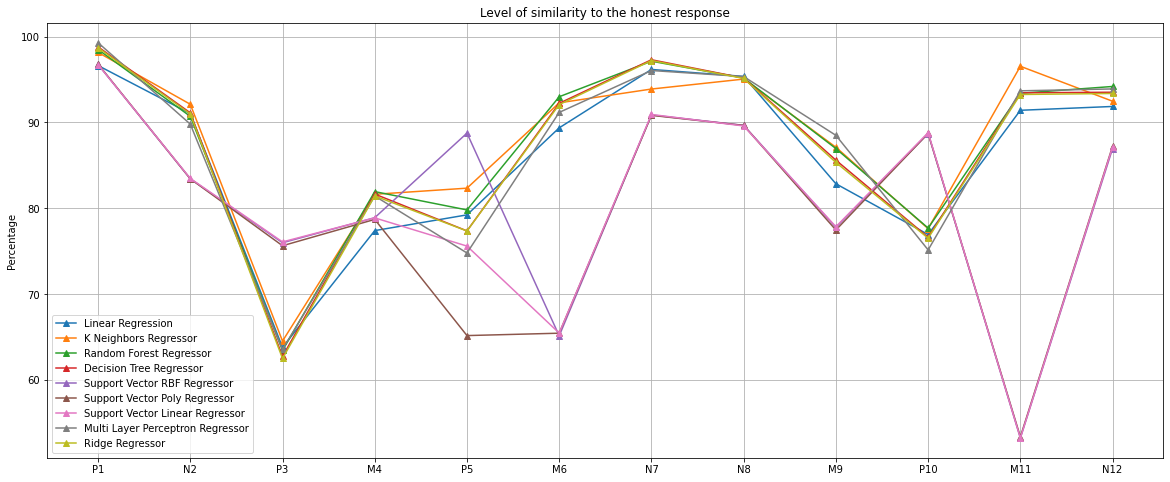

In [101]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)


for i in range(len(perc)):
  plt.plot(perc[i], label='{}'.format(reg_glob[i]), marker='^')

plt.title('Level of similarity to the honest response')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.xticks(range(0,12), labels=e)
plt.show()

In [102]:
score = {'Root Mean Squared Error': rmse_glob, 'Mean Squared Error': mse_glob,  'Mean Absolute Error': mae_glob}

In [104]:
resume = pd.DataFrame(score, index=reg_glob)
resume

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error
Linear Regression,0.265433,0.070455,0.218302
K Neighbors Regressor,0.260330,0.067772,0.213253
Random Forest Regressor,0.260420,0.067819,0.214029
Decision Tree Regressor,0.262331,0.068818,0.215638
Support Vector RBF Regressor,0.264599,0.070012,0.218564
Support Vector Poly Regressor,0.264945,0.070196,0.218182
Support Vector Linear Regressor,0.264684,0.070057,0.218315
Multi Layer Perceptron Regressor,0.260301,0.067756,0.213433
Ridge Regressor,0.260310,0.067761,0.213773
